## 3. The Impact of Varing the Batch Size

The changes here are that we will rerun the code to generate the validation dataset and change the batch size from 32 to 10,000 to see the impact on the loss value and prediction model accuracy.

In similar mannaer download and import the validation dataset by specifiying: 
#### Train = False

In [5]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
device = 'cuda' if torch.cuda.is_available() else 'cpu'  

In [6]:
from torchvision import datasets
data_folder = "Datasets"                         

In [7]:
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
train_images = fmnist.data                                
train_targets = fmnist.targets                            

In [8]:
validation_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
validation_images = validation_fmnist.data                                
validation_targets = validation_fmnist.targets 

In [9]:
from common_functions import get_data,build_model,train_with_validation,display_train_validation_results
                             

In [10]:
train_data_loader, validation_data_loader = get_data(32,train_images,train_targets,validation_images,validation_targets)

In [11]:
model,loss_function, optimizer = build_model(optimizer=SGD, lr=1e-2)

In [12]:
train_losses, train_accuracies, validation_losses, validation_accuracies = train_with_validation(10,
                                                                                                 train_data_loader,
                                                                                                 validation_data_loader,
                                                                                                 model,
                                                                                                 loss_function,
                                                                                                 optimizer)

Epoch: 1
Train Loss: 0.842
Train Accuracy: 81%
Validation Loss: 0.602
Validation Accuracy: 80%
<--------------------------------------------------------->
Epoch: 2
Train Loss: 0.535
Train Accuracy: 82%
Validation Loss: 0.541
Validation Accuracy: 81%
<--------------------------------------------------------->
Epoch: 3
Train Loss: 0.483
Train Accuracy: 84%
Validation Loss: 0.493
Validation Accuracy: 83%
<--------------------------------------------------------->
Epoch: 4
Train Loss: 0.455
Train Accuracy: 85%
Validation Loss: 0.471
Validation Accuracy: 84%
<--------------------------------------------------------->
Epoch: 5
Train Loss: 0.435
Train Accuracy: 85%
Validation Loss: 0.463
Validation Accuracy: 84%
<--------------------------------------------------------->
Epoch: 6
Train Loss: 0.420
Train Accuracy: 86%
Validation Loss: 0.444
Validation Accuracy: 84%
<--------------------------------------------------------->
Epoch: 7
Train Loss: 0.407
Train Accuracy: 86%
Validation Loss: 0.432


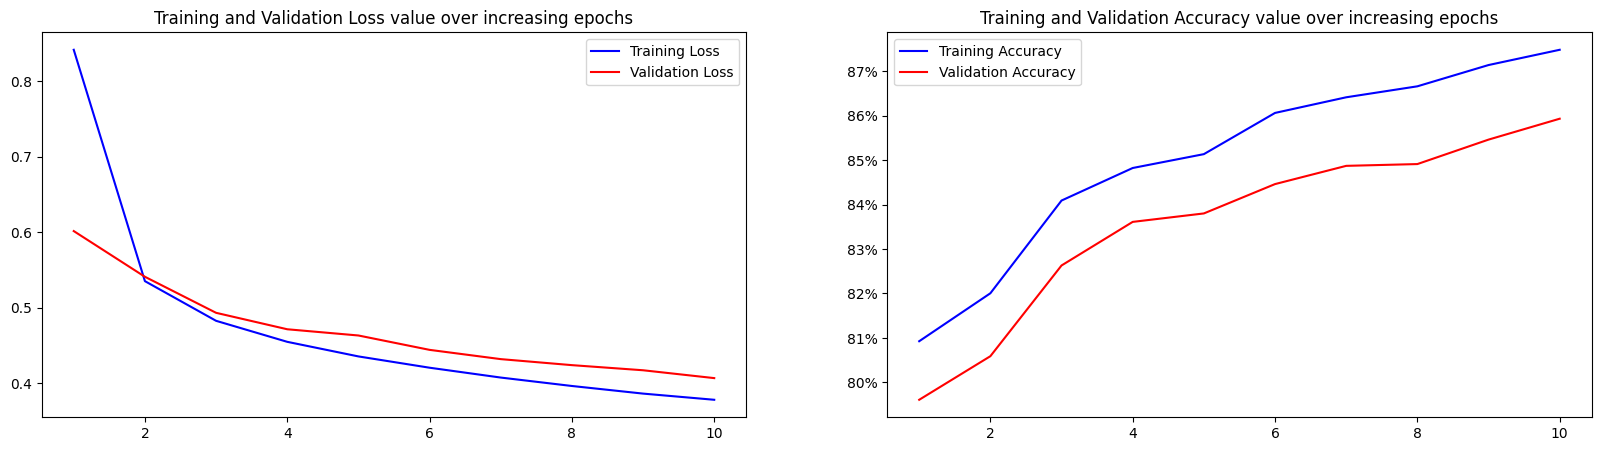

In [13]:
display_train_validation_results(10,train_losses, train_accuracies, validation_losses, validation_accuracies)

#### Change Batch size from 32 to 10,000

In [18]:
train_data_loader, validation_data_loader = get_data(10000,                        #change batch size to 10000
                                                     train_images,train_targets,
                                                     validation_images,validation_targets)     

In [19]:
model,loss_function, optimizer = build_model(optimizer=SGD, lr=1e-2)

In [20]:
train_losses, train_accuracies, validation_losses, validation_accuracies = train_with_validation(10,
                                                                                                 train_data_loader,
                                                                                                 validation_data_loader,
                                                                                                 model,
                                                                                                 loss_function,
                                                                                                 optimizer)

Epoch: 1
Train Loss: 2.300
Train Accuracy: 18%
Validation Loss: 2.269
Validation Accuracy: 18%
<--------------------------------------------------------->
Epoch: 2
Train Loss: 2.248
Train Accuracy: 27%
Validation Loss: 2.222
Validation Accuracy: 27%
<--------------------------------------------------------->
Epoch: 3
Train Loss: 2.203
Train Accuracy: 34%
Validation Loss: 2.178
Validation Accuracy: 34%
<--------------------------------------------------------->
Epoch: 4
Train Loss: 2.160
Train Accuracy: 41%
Validation Loss: 2.137
Validation Accuracy: 40%
<--------------------------------------------------------->
Epoch: 5
Train Loss: 2.120
Train Accuracy: 47%
Validation Loss: 2.098
Validation Accuracy: 46%
<--------------------------------------------------------->
Epoch: 6
Train Loss: 2.081
Train Accuracy: 53%
Validation Loss: 2.059
Validation Accuracy: 51%
<--------------------------------------------------------->
Epoch: 7
Train Loss: 2.042
Train Accuracy: 57%
Validation Loss: 2.022


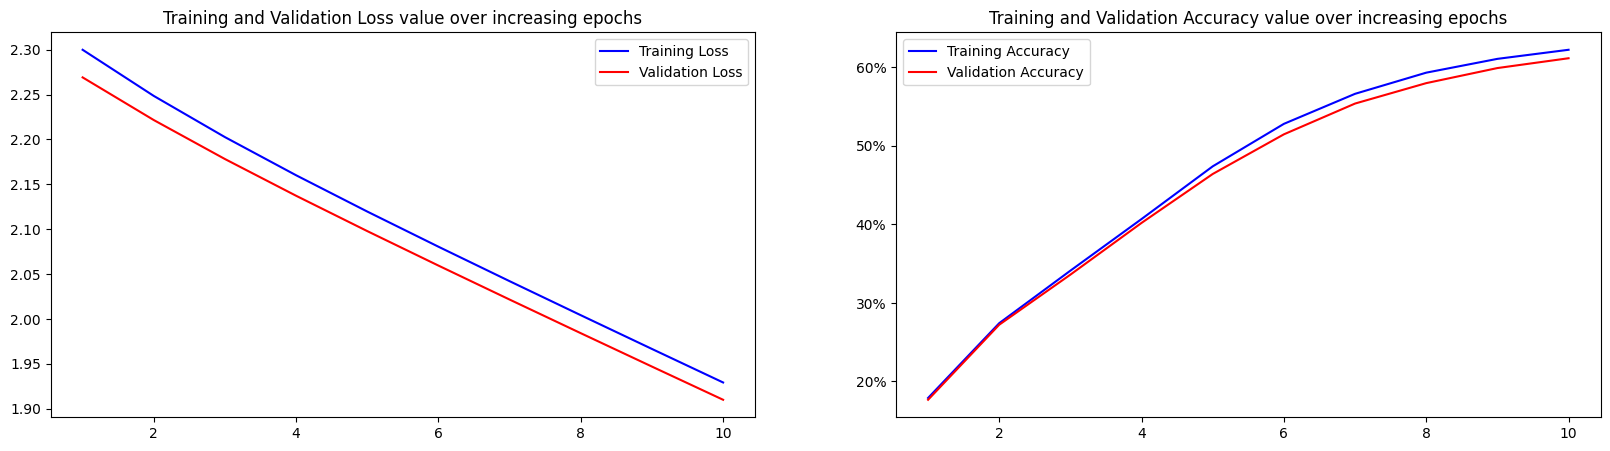

In [21]:
display_train_validation_results(10,train_losses, train_accuracies, validation_losses, validation_accuracies)

Having a lower batch size generally helps in achieving optimal accuracy when you have a small number of epochs, but it should not be so low that training time is impacted.